# **Atif Jamil**

**Email:** [aatifkh8n@gmail.com](mailto:aatifkh8n@gmail.com)

**GitHub:** [aatifkh8n](https://github.com/aatifkh8n) |
**Kaggle:** [aatifkh8n](https://kaggle.com/aatifkh8n) |
**LinkedIn:** [Atif Jamil](https://linkedin.com/in/atif--jamil)

### **Purpose:** Assignment 02 - Problem 01

---

## “Employee Performance and Salary Analysis”
You are tasked with analyzing employee performance and salary data for a multinational
corporation. Since there is no available dataset, you will need to generate your own dataset using
pandas functions and carry out various tasks related to employee performance, salary analysis and
department-level trends.

In [72]:
# importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Part (A): Dataset Creation
Create a dataset of 500 employees with the following columns:

i. Employee ID: A unique identifier for each employee (e.g., EMP001, EMP002, etc.).

ii. Name: Generate random names for employees. You can use libraries like Faker to assist
with this.

iii. Age: Generate random ages between 22 and 60.

iv. Gender: Randomly assign genders (e.g., Male, Female).

v. Department: Create a list of 5 departments (e.g., "Sales", "HR", "IT", "Finance",
"Marketing") and randomly assign each employee to a department.

vi. Salary ($): Randomly generate salary values between $40,000 and $120,000.

vii. Years at Company: Generate random integers between 1 and 30 representing the years
an employee has worked at the company.

viii. Performance Score: Assign a performance score (1-5) to each employee.

ix. Promotion Eligibility: Randomly assign "Yes" or "No" based on the performance score.
Employees with a score of 4 or 5 are eligible for promotion.

In [2]:
from faker import Faker

fake = Faker()

In [84]:
NUMBER_OF_EMPLOYEES = 500

employees = {
    'id': [f'EMP{i+1:03}' for i in range(NUMBER_OF_EMPLOYEES)],
    'name': [fake.name() for i in range(NUMBER_OF_EMPLOYEES)],
    'age': np.random.randint(22, 60, size=NUMBER_OF_EMPLOYEES),
    'gender': np.random.choice(['Male', 'Female'], NUMBER_OF_EMPLOYEES),
    'salary': np.random.randint(10000, 50000, size=NUMBER_OF_EMPLOYEES),
    'department': np.random.choice(['Sales', 'HR', 'IT', 'Finance', 'Marketing'], NUMBER_OF_EMPLOYEES),
    'salary': np.random.randint(40_000, 120_000, size=NUMBER_OF_EMPLOYEES),
    'years': np.random.randint(0, 10, size=NUMBER_OF_EMPLOYEES),
    'performance_score': np.random.randint(1, 5, size=NUMBER_OF_EMPLOYEES),
}

df = pd.DataFrame(employees)

# df['promotion_eligibility'] = "Yes" if df['performance_score'] >= 4 else "No"

df.tail()

,id,name,age,gender,salary,department,years,performance_score
495,EMP496,Jennifer Smith,58,Female,77172,Marketing,3,3
496,EMP497,Andrew Hale,59,Female,109839,IT,7,3
497,EMP498,Randy Vaughn,51,Male,73764,Marketing,7,3
498,EMP499,Michael Trevino,22,Female,79532,Finance,7,3
499,EMP500,Theresa Roberson,56,Female,111740,Sales,0,1


In [27]:
df['promotion_eligibility'] = "No"
df.loc[df['performance_score'] >= 4, 'promotion_eligibility'] = "Yes"

In [28]:
df.tail()

,id,name,age,salary,department,years,performance_score,promotion_eligibility
495,EMP496,Kirk Miller,Female,105249,IT,6,1,No
496,EMP497,Dylan Cox,Female,76421,Sales,4,2,No
497,EMP498,Diana Schwartz,Male,107445,Sales,2,3,No
498,EMP499,Paul Sullivan,Male,73640,Sales,8,4,Yes
499,EMP500,Eric Rubio,Male,46144,IT,8,3,No


---
### Part (B): Data Cleaning and Transformation
i. Randomly set 10% of Salary values to missing (NaN).

In [29]:
PERCENTAGE = 10

n_nan = int(len(df) * PERCENTAGE / 100)

nan_indices = np.random.choice(df.index, n_nan, replace=False)

df.loc[nan_indices, 'salary'] = np.nan

df.head()

,id,name,age,salary,department,years,performance_score,promotion_eligibility
0,EMP001,Ryan Lopez,Female,102532.0,Marketing,3,1,No
1,EMP002,Ruben Figueroa,Male,99344.0,IT,9,3,No
2,EMP003,Ronald Castro,Female,112746.0,Sales,3,1,No
3,EMP004,Anthony Martin,Female,101215.0,HR,9,1,No
4,EMP005,Charles Douglas,Male,NaN,Finance,2,3,No


ii. In the Performance Score column, randomly replace 5% of the values with invalid
scores (e.g., -1, 6, etc.).

In [31]:
PERCENTAGE = 5

n_nan = int(len(df) * PERCENTAGE / 100)

nan_indices = np.random.choice(df.index, n_nan, replace=False)

df.loc[nan_indices, 'performance_score'] = np.random.choice([-2, -1, 6, 7], n_nan)

df.head()

,id,name,age,salary,department,years,performance_score,promotion_eligibility
0,EMP001,Ryan Lopez,Female,102532.0,Marketing,3,1,No
1,EMP002,Ruben Figueroa,Male,99344.0,IT,9,3,No
2,EMP003,Ronald Castro,Female,112746.0,Sales,3,1,No
3,EMP004,Anthony Martin,Female,101215.0,HR,9,1,No
4,EMP005,Charles Douglas,Male,NaN,Finance,2,3,No


In [35]:
df[df['performance_score'] < 0]

,id,name,age,salary,department,years,performance_score,promotion_eligibility
18,EMP019,Mason Mcconnell,Female,116712.0,IT,0,-2,No
24,EMP025,Nicole Young,Male,71973.0,Finance,0,-2,No
52,EMP053,Paul Elliott,Male,78699.0,HR,8,-1,No
74,EMP075,Lisa Johnson,Female,51169.0,Sales,2,-2,No
101,EMP102,Veronica Smith,Female,NaN,Sales,2,-2,No
117,EMP118,Mark Sanchez,Male,98226.0,HR,0,-1,No
154,EMP155,Caleb Haynes,Male,79770.0,HR,9,-1,No
360,EMP361,John Taylor,Female,62330.0,HR,0,-2,No
437,EMP438,Linda Anderson,Female,95214.0,Marketing,8,-1,No
443,EMP444,Julie Stark,Male,NaN,Sales,2,-2,No


In [36]:
df[df['performance_score'] < 5]

,id,name,age,salary,department,years,performance_score,promotion_eligibility
0,EMP001,Ryan Lopez,Female,102532.0,Marketing,3,1,No
1,EMP002,Ruben Figueroa,Male,99344.0,IT,9,3,No
2,EMP003,Ronald Castro,Female,112746.0,Sales,3,1,No
3,EMP004,Anthony Martin,Female,101215.0,HR,9,1,No
4,EMP005,Charles Douglas,Male,NaN,Finance,2,3,No
...,...,...,...,...,...,...,...,...
495,EMP496,Kirk Miller,Female,105249.0,IT,6,1,No
496,EMP497,Dylan Cox,Female,76421.0,Sales,4,2,No
497,EMP498,Diana Schwartz,Male,107445.0,Sales,2,3,No
498,EMP499,Paul Sullivan,Male,73640.0,Sales,8,4,Yes


iii. Replace missing Salary values with the median salary for the corresponding
Department.

In [41]:
salary_median = df['salary'].median()

print('Salary Median:', salary_median)

df['salary'].fillna(salary_median, inplace=True)

df[df['salary'] == salary_median].head()

Salary Median: 79296.0


C:\Users\8 A K R\AppData\Local\Temp\ipykernel_6924\3258938387.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(salary_median, inplace=True)


,id,name,age,salary,department,years,performance_score,promotion_eligibility
4,EMP005,Charles Douglas,Male,79296.0,Finance,2,3,No
19,EMP020,Christopher Estes,Male,79296.0,Sales,5,2,No
29,EMP030,Christopher Rogers,Female,79296.0,HR,5,7,No
49,EMP050,James Price,Female,79296.0,Sales,8,4,Yes
51,EMP052,Joshua Arnold,Female,79296.0,Finance,7,4,Yes


iv. Filter out employees with invalid Performance Score values (outside the range of 1 to
5).

In [52]:
df[(df['performance_score'] < 0) | (df['performance_score'] > 5)]

,id,name,age,salary,department,years,performance_score,promotion_eligibility
18,EMP019,Mason Mcconnell,Female,116712.0,IT,0,-2,No
24,EMP025,Nicole Young,Male,71973.0,Finance,0,-2,No
25,EMP026,Juan Sanders,Male,119643.0,IT,4,7,No
29,EMP030,Christopher Rogers,Female,79296.0,HR,5,7,No
52,EMP053,Paul Elliott,Male,78699.0,HR,8,-1,No
63,EMP064,Donald Martin,Male,50494.0,HR,3,6,No
65,EMP066,Lee Clark,Male,110018.0,Marketing,9,7,No
74,EMP075,Lisa Johnson,Female,51169.0,Sales,2,-2,No
101,EMP102,Veronica Smith,Female,79296.0,Sales,2,-2,No
117,EMP118,Mark Sanchez,Male,98226.0,HR,0,-1,No


---
### Part (C): Department-Wise Salary Analysis
i. Group employees by Department and calculate:

- The average Salary ($) in each department.

In [53]:
df.groupby('department')['salary'].mean()

department
Finance      79038.228261
HR           80719.155963
IT           78805.924370
Marketing    82949.949495
Sales        76907.382716
Name: salary, dtype: float64

- The total number of employees in each department.

In [56]:
df.groupby('department')['name'].count()

department
Finance       92
HR           109
IT           119
Marketing     99
Sales         81
Name: name, dtype: int64

ii. Identify the department with the highest average salary and discuss what factors may
be contributing to this.

In [66]:
df.groupby('department')['salary'].mean()

# 'Marketing' is the department with the highest mean salary
# Reason maybe the marketing team has the most senior employees in the company.

department
Finance      79038.228261
HR           80719.155963
IT           78805.924370
Marketing    82949.949495
Sales        76907.382716
Name: salary, dtype: float64

iii. What is the average salary of employees who are eligible for promotion (Promotion
Eligibility == "Yes") vs those who are not eligible?

In [69]:
promotion_eligibility_salary_mean = df.groupby('promotion_eligibility')['salary'].mean()

promotion_eligibility_salary_mean

promotion_eligibility
No     80778.607235
Yes    76354.265487
Name: salary, dtype: float64

iv. Create a boxplot using Matplotlib to visualize the distribution of salaries for both
groups.

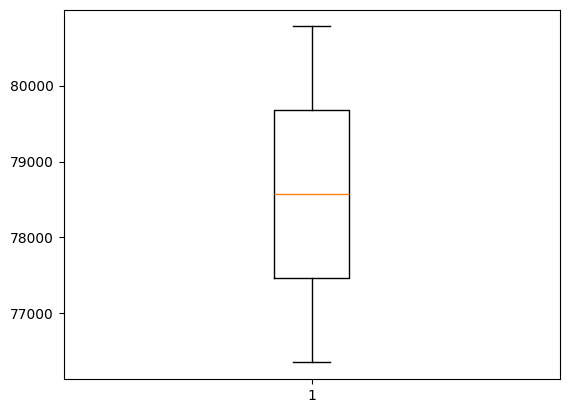

In [73]:
plt.boxplot(promotion_eligibility_salary_mean)
plt.show()

v. Examine the correlation between Years at Company and Salary using a scatter plot.
Based on the plot, is there a clear trend that shows whether employees who have worked
longer at the company earn higher salaries?

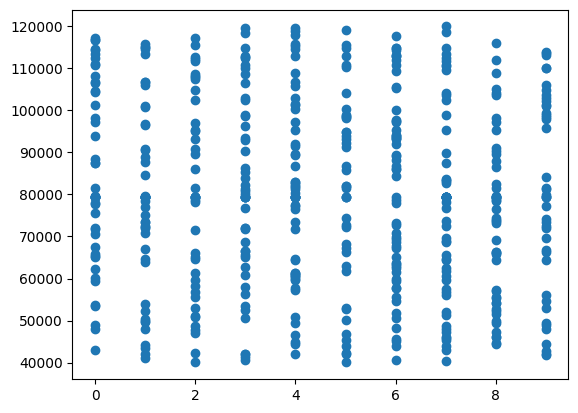

In [76]:
plt.scatter(df['years'], df['salary'])
plt.show()

# No there is no trend or pattern in the data for years and salary

vi. Group employees by Department and visualize the age distribution using a histogram
for each department. Discuss any patterns or trends related to the age of employees in
different departments.

(array([1., 0., 0., 0., 2., 0., 0., 1., 0., 1.]),
 array([38.80952381, 39.12512315, 39.4407225 , 39.75632184, 40.07192118,
        40.38752053, 40.70311987, 41.01871921, 41.33431856, 41.6499179 ,
        41.96551724]),
 <BarContainer object of 10 artists>)

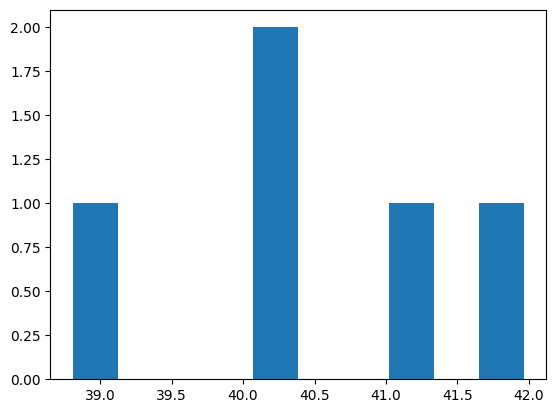

In [90]:
plt.hist(df.groupby('department')['age'].mean())

---
### Part (D): Visualization of Dataset
i. Bar Chart: Create a bar chart to compare the average salaries across different
departments. What does this chart reveal about salary distribution in the company?

In [92]:
plt.bar(df.groupby('department')['salary'].mean())

TypeError: bar() missing 1 required positional argument: 'height'

In [ ]:
# Dataset
# desc
# steps
# results
# learning outcomes